# Proyecto práctico

## Unidad 3 - Aprendizaje supervisado

El proyecto práctico consiste en abordar un problema de clasificación de documentos textuales. Tenemos a nuestra disposición un dataset de noticias de prensa en español publicada por el medio "CNN Chile".

Las noticias están divididas en 7 categorías temáticas: *'pais','deportes','tendencias','tecnologias','cultura','economia','mundo'*

El proyecto se divide en dos partes:

- Utilizar al menos 3 estrategías para entrenar modelos de clasificación capaces de clasificar las noticias según su categoría temática.

- Explorar cuáles son las características que permiten explicar las decisiones de su modelo.

## 0. Evaluación

El proyecto se realiza de forma individual. Se entrega a más tardar el **lunes 30 de noviembre** en su repositorio GitHub.

**Pauta de evaluación:**

Competencia 1: Aplicar un protocolo de aprendizaje supervisado para resolver un problema clasificación estandar, utilizando un entorno de programación en Python

- < 2 : El protocolo de aprendizaje supervisado utilizado es incompleto y/o presenta errores importantes
- 2 a 3.9 : El protocolo de aprendizaje supervisado utilizado es incompleto o presenta un error importante
- 4 a 5.5 : El protocolo de aprendizaje es completo, no tiene error, pero las estrategias utilizadas son relativamente simples y el rendimiento de los modelos es perfectible.
- 5.6 a 7.0 : El protocolo de aprendizaje es completo, no tiene error y al menos una de las estrategias utilizadas a necesitado un trabajado más avanzado y/o permite obtener un mejor rendimiento.

Competencia 2: Explicar el rendimiento de un modelo de clasificación aplicando un protocolo de evaluación Precision/Recall/F-Score

- < 2 : El trabajo no presenta explicaciones del rendimiento de los modelos de clasificación
- 2 a 3.9 : El trabajo presenta algunas explicaciones pero tienen errores.
- 4 a 5.5 : El trabajo presenta explicaciones correctas del rendimiento de los modelos
- 5.6 a 7 : El trabajo presenta explicaciones correctas del rendimiento de los modelos y además presenta un método para explicar las decisiones/errores


## 1. Dataset

In [1]:
import pandas as pd

df = pd.read_csv('cnnchile_7000.csv')
df

,country,media_outlet,url,title,text,date,category
0,chile,cnnchile,https://www.cnnchile.com/pais/pdta-del-colegio...,Pdta. del Colegio de Matronas explicó los ries...,La Federación de Estudiantes de la Universidad...,2018-03-29 00:00:00.000000,pais
1,chile,cnnchile,https://www.cnnchile.com/pais/defensoria-ninez...,Defensoría de la Niñez pide al Estado velar po...,La Defensoría de la Niñez emitió este domingo ...,2020-08-02 00:00:00.000000,pais
2,chile,cnnchile,https://www.cnnchile.com/pais/cuanto-les-pagar...,¿Cuánto les pagarán a los vocales de mesa?,El monto del bono es de dos tercios de Unidad ...,2016-10-20 00:00:00.000000,pais
3,chile,cnnchile,https://www.cnnchile.com/pais/sobrino-de-aleja...,Sobrino de Alejandro Navarro intenta “funar” e...,Una nueva polémica tiene esta carrera presiden...,2017-11-13 00:00:00.000000,pais
4,chile,cnnchile,https://www.cnnchile.com/pais/analisis-sobre-e...,Análisis sobre el aumento de impuestos para al...,Especialistas recomiendan no consumir más de 2...,2014-05-05 00:00:00.000000,pais
...,...,...,...,...,...,...,...
6995,chile,cnnchile,https://www.cnnchile.com/tecnologias/playstati...,PlayStation 5 vs Xbox Series X: Mira la compar...,Las compañías ya han revelado muchos detalles ...,2020-09-18 00:00:00.000000,tecnologias
6996,chile,cnnchile,https://www.cnnchile.com/tecnologias/android-l...,Android le dará “una paliza” a Windows en 2013,Se proyecta que tras un virtual empate en 2012...,2013-04-04 00:00:00.000000,tecnologias
6997,chile,cnnchile,https://www.cnnchile.com/tecnologias/regalos-t...,Regalos tecnológicos marcaron pauta en Navidad,Tablets y smartphones fueron los regalos tecno...,2012-12-26 00:00:00.000000,tecnologias
6998,chile,cnnchile,https://www.cnnchile.com/tecnologias/jugar-con...,Jugar con Fox en Starlink vale totalmente la p...,Crecí jugando clásicos de naves como Terminal ...,2018-10-30 00:00:00.000000,tecnologias


In [2]:
from pandasql import sqldf

q="""SELECT category, count(*) FROM df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,tendencias,1000
1,tecnologias,1000
2,pais,1000
3,mundo,1000
4,economia,1000
5,deportes,1000
6,cultura,1000


Observamos que el dataset se encuentra balanceado con 1000 noticias por cada categoría. Podemos ver también que posee otras columnas como `country` y `date`, sin embargo,  solo utilizaremos `text` y `category` por lo que las demás podemos ignorarlas.

In [3]:
df = df[['text', 'category']]

In [4]:
df[df.duplicated()]

,text,category
172,Síguenos en @CNNChile con la actualización min...,pais
201,Síguenos en @CNNChile con la actualización min...,pais
288,Síguenos en @CNNChile con la actualización min...,pais
342,En pantalla te leemos y comentamos desde twitt...,pais
361,Síguenos en @CNNChile con la actualización min...,pais
...,...,...
6803,Síguenos en @CNNChile con la actualización min...,tecnologias
6804,Síguenos en @CNNChile con la actualización min...,tecnologias
6905,Síguenos en @CNNChile con la actualizació...,tecnologias
6910,En pantalla te leemos y comentamos desde twitt...,tecnologias


In [5]:
df['text'].iloc[172]

'Síguenos en\xa0@CNNChile\xa0con la actualización minuto a minuto de los hechos más importantes de Chile y el mundo.\n\n\nPara participar de los debates de nuestra programación utiliza\xa0#LaNoticiaCNN.'

Podemos observar que hay elementos duplicados y que más que noticias, parecen promociones a las redes sociales del sitio. Procedemos a quitarlas del dataframe.

In [6]:
new_df = df.drop_duplicates()

In [7]:
q="""SELECT category, count(*) FROM new_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,tendencias,1000
1,cultura,1000
2,tecnologias,976
3,pais,973
4,mundo,971
5,deportes,971
6,economia,952


Para mantener el dataframe balanceado tomamos el número de elementos correspondiente al menor count (952) en todas las categorías.

In [8]:
new_df = new_df.groupby('category').sample(n=952, random_state=2)

In [9]:
q="""SELECT category, count(*) FROM new_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,tendencias,952
1,tecnologias,952
2,pais,952
3,mundo,952
4,economia,952
5,deportes,952
6,cultura,952


In [10]:
new_df.reset_index(drop=True, inplace=True)
new_df

,text,category
0,“Chilling Adventures of Sabrina” no tiene abso...,cultura
1,El músico chileno Tomás Salcedo grabó guitarra...,cultura
2,Uno de los nombres de culto del rock progresiv...,cultura
3,"La obra, en cartelera en el Centro Cultural M1...",cultura
4,“Adiós Litchfield”. Eso dice el teaser de la n...,cultura
...,...,...
6659,El encuentro busca mostrar los productos y pla...,tendencias
6660,El descubrimiento de 20 lunas previamente desc...,tendencias
6661,"Actualmente las ropas técnicas, ofrecen capas ...",tendencias
6662,En el bloque de internet además conocimos la d...,tendencias


### Bag of words + tf-idf

Para representar los textos utilizaremos el enfoque *Bag of words* con *Term frequency - inverse document frequency* con:


```python
from sklearn.feature_extraction.text import TfidfVectorizer
```



## Preprocessing

### NLTK

[Natural Language toolkit](https://www.nltk.org/)

Antes de utilizar *tfidf* sobre nuestros datos, limpiaremos un poco las noticias quitando la puntuación, los números y las stopwords del idioma Español, pasando todo a minúsculas para finalmente hacer *stemming* sobre las que queden con `SnowballStemmer`

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize.casual import casual_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer
from string import punctuation
import re
from tqdm.auto import tqdm

### nltk: descargas necesarias

In [12]:
#nltk.download('stopwords')
#nltk.download('punkt')

In [13]:
#stopwords
spanish_stopwords = stopwords.words('spanish')

#stemmer
stemmer = SnowballStemmer('spanish')

#puntuacion
non_words = list(punctuation)
#incluir puntuacion del español
non_words.extend(['¿', '¡'])
#numeros
non_words.extend(map(str,range(10)))

In [14]:
stemmer = SnowballStemmer('spanish')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def text_cleaner(text, stem=False):
    # puntuacion
    text = ''.join([c for c in text if c not in non_words])
    # caracteres repetidos
    text = re.sub(r'(.)\1+', r'\1\1', text)
    # tokenize
    tokens = casual_tokenize(text, preserve_case=False)
    # quitar stopwords
    filtered_sentence = [w for w in tokens if not w in spanish_stopwords]
    # stemming
    if stem:
        filtered_sentence = stem_tokens(filtered_sentence, stemmer)
    
    return " ".join(filtered_sentence)

### Texto original

In [15]:
new_df.text[2]

'Uno de los nombres de culto del rock progresivo mundial es Gong, agrupación con más de 50 años de trayectoria que continúa girando por el mundo junto al guitarrista Steve Hillage. Desde su glorioso pasado, Gong ilumina su constante actualidad y sigue generando una obra perenne para el futuro que, irremediablemente, llega a ser presente. En mayo de 2019 publicaron su aclamado y más reciente disco The Universe Also Collapse, el segundo de esta etapa tras la muerte de su fundador Daevid Allen, que antes de partir designó al guitarrista y vocalista Kavus Torabi como continuador del legado del grupo, así como también al resto de la banda que ya lo acompañaba en vida. La formación actual está integrado por Kavus Torabi en guitarra y voz, con Fabio Golfetti en guitarra, Dave Sturt en bajo, Ian East en saxo y Cheb Nettles en batería, además del virtuoso guitarrista Steve Hillage, encargado de dar nueva vida a la emblemática discografía del grupo. Las entradas para este concierto estarán a la 

### Texto preprocesado sin stemming

In [16]:
text_cleaner(new_df.text[2])

'nombres culto rock progresivo mundial gong agrupación años trayectoria continúa girando mundo junto guitarrista steve hillage glorioso pasado gong ilumina constante actualidad sigue generando obra perenne futuro irremediablemente llega ser presente mayo publicaron aclamado reciente disco the universe also collapse segundo etapa tras muerte fundador daevid allen partir designó guitarrista vocalista kavus torabi continuador legado grupo así resto banda acompañaba vida formación actual integrado kavus torabi guitarra voz fabio golfetti guitarra dave sturt bajo ian east saxo cheb nettles batería además virtuoso guitarrista steve hillage encargado dar nueva vida emblemática discografía grupo entradas concierto venta lunes ticketekcl recargo the knife eurocentro rock music portal lyon precios'

### Texto preprocesado con stemming

In [17]:
text_cleaner(new_df.text[2], stem=True)

'nombr cult rock progres mundial gong agrup años trayectori continu gir mund junt guitarr stev hillag glorios pas gong ilumin constant actual sig gener obra perenn futur irremedi lleg ser present may public aclam recient disc the univ also collaps segund etap tras muert fundador daev allen part design guitarr vocal kavus torabi continu leg grup asi rest band acompañ vid formacion actual integr kavus torabi guitarr voz fabi golfetti guitarr dav sturt baj ian east sax cheb nettl bat ademas virtuos guitarr stev hillag encarg dar nuev vid emblemat discograf grup entrad conciert vent lun ticketekcl recarg the knif eurocentr rock music portal lyon preci'

Más adelante compararemos los efectos que tienen sobre los resultados el uso de estos distintos niveles de procesamiento sobre los textos.

### Train - Test

Utilizaremos la proporción 70-30 en los subconjuntos para entrenar y probar los modelos. Para mantener las clases balanceadas tomaremos muestras aleatorias de igual tamaño por cada categoría. 

In [18]:
train_size = 0.70

In [19]:
train_idxs = new_df.groupby('category').sample(frac=train_size, random_state=2).index
train_df = new_df.iloc[train_idxs]
q="""SELECT category, count(*) FROM train_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,tendencias,666
1,tecnologias,666
2,pais,666
3,mundo,666
4,economia,666
5,deportes,666
6,cultura,666


Para el testing utilizar los elementos que no fueron seleccionados para entrenar.

In [20]:
test_idxs = pd.concat([new_df, train_df]).drop_duplicates(keep=False).index
test_df = new_df.iloc[test_idxs]
q="""SELECT category, count(*) FROM test_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,tendencias,286
1,tecnologias,286
2,pais,286
3,mundo,286
4,economia,286
5,deportes,286
6,cultura,286


## Imports: utilidades

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib notebook
from functools import partial
import numpy as np

## Imports: modelos de clasificacion

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

## Codificar las categorías?

El mapeo de de las etiquetas de clases a números enteros previo al ajuste de los modelos nos entrega, en general, una ligera mejora en el tiempo de ajuste.

In [23]:
lb = LabelEncoder()
ylabels = new_df['category']

lb.fit(ylabels.unique())
true_labels = [lb.inverse_transform([i])[0] for i in range(ylabels.nunique())]
ylabels_train_target = lb.fit_transform(ylabels[train_idxs])
ylabels_test_target = lb.fit_transform(ylabels[test_idxs])

for label in true_labels:
    print(f" {label:<12} :  {lb.transform([label])[0]}")

 cultura      :  0
 deportes     :  1
 economia     :  2
 mundo        :  3
 pais         :  4
 tecnologias  :  5
 tendencias   :  6


In [24]:
vectorizer = TfidfVectorizer(preprocessor=partial(text_cleaner, stem=True))
XD = vectorizer.fit_transform(new_df['text'])
feature_names = vectorizer.get_feature_names()

In [25]:
X_train = XD[train_idxs]
X_test = XD[test_idxs]

### tiempo codificandolas

In [145]:
%%timeit -r 3 -n 10
lgr = LogisticRegression(random_state=42, multi_class='ovr', class_weight=None)
lgr.fit(X_train, ylabels_train_target)

2.79 s ± 93.6 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


### tiempo sin codificarlas

In [146]:
%%timeit -r 3 -n 10
lgr = LogisticRegression(random_state=42, multi_class='ovr', class_weight=None)
lgr.fit(X_train, ylabels[train_idxs])

2.86 s ± 194 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


## Representar y comparar los resultados

```python
from sklearn.metrics import plot_confusion_matrix, classification_report
```

Utilizaremos la función `classification_report` que nos entrega las métricas **Precision**, **Recall**, **F1 score** y **Accuracy**.  para ver las estadísticas del desempeño de nuestros modelos. En el caso de esta última, como las clases se encuentran balanceadas, esta métrica no es mala forma de resumir los resultados. También utilizaremos la **Matriz de confusión** para observar con mas detalle las clases que presentan más errores y estudiar las posibles causas.

In [26]:
def results(ylb, text_clf, X_test):
    predicted = text_clf.predict(X_test)
    clf_name = type(text_clf).__name__
    print(f"Resultados clasificación\n{clf_name}\n\n")
    print(classification_report(ylb, predicted, target_names=true_labels))
    fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)
    plot_confusion_matrix(text_clf, X_test, ylb,
                          display_labels=true_labels,
                          ax=ax,
                          cmap='Blues')
    ax.set_title(f"Matriz de Confusión\n{clf_name}")
    plt.xticks(rotation=60)
    plt.show()

In [33]:
def print_top_x(clf, x=10):
    clf_name = type(clf).__name__
    print(f"Palabras más importantes del clasificador \n{clf_name}\n\n")
    for i, class_label in enumerate(true_labels):
        topx = np.argsort(clf.coef_[i])[-x:][::-1]
        print(f"{class_label}:  {' '.join(feature_names[j] for j in topx)}")
        print("\t", end='')
        print([f"{clf.coef_[i][j]:.1f}" for j in topx])
        print()

# Logistic regression

Con el argumento `multi_class=ovr` se ajusta un problema de clasificación binaria por cada clase, del tipo *one versus rest*.

In [34]:
lgr = LogisticRegression(random_state=42,
                         multi_class='ovr',
                        )
lgr.fit(X_train, ylabels_train_target)

LogisticRegression(multi_class='ovr', random_state=42)

Resultados clasificación
LogisticRegression


              precision    recall  f1-score   support

     cultura       0.84      0.93      0.89       286
    deportes       0.89      0.90      0.90       286
    economia       0.83      0.83      0.83       286
       mundo       0.82      0.79      0.80       286
        pais       0.77      0.78      0.78       286
 tecnologias       0.70      0.69      0.69       286
  tendencias       0.70      0.65      0.68       286

    accuracy                           0.80      2002
   macro avg       0.79      0.80      0.79      2002
weighted avg       0.79      0.80      0.79      2002



<IPython.core.display.Javascript object>


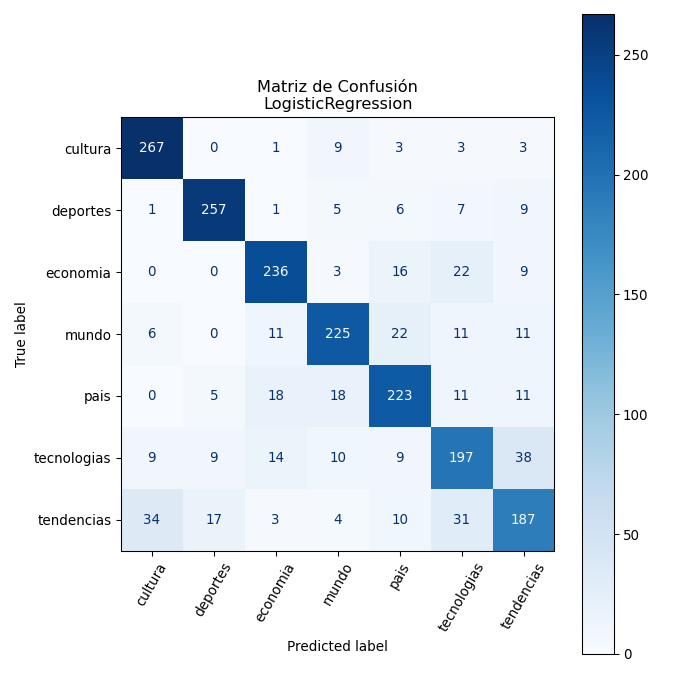

In [35]:
results(ylabels_test_target, lgr, X_test)

In [36]:
print_top_x(lgr)

Palabras más importantes del clasificador 
LogisticRegression


cultura:  artist pelicul music band cantant the seri cancion estren disc
	['4.5', '3.9', '3.2', '3.0', '2.9', '2.9', '2.8', '2.8', '2.8', '2.5']

deportes:  futbol seleccion jugador cop col gol deport club hinch hipic
	['3.8', '3.6', '3.5', '3.5', '3.3', '3.1', '3.1', '2.8', '2.8', '2.7']

economia:  econom empres merc inversion banc alza adjunt preci comerci caid
	['6.2', '3.9', '3.3', '3.1', '2.7', '2.6', '2.2', '2.1', '2.0', '2.0']

mundo:  trump unid polic president venezuel pais dij gobiern muert eleccion
	['3.5', '3.3', '3.2', '3.1', '3.1', '3.0', '2.8', '2.4', '2.3', '2.2']

pais:  ministr carabiner diput region polit educ parlamentari piñer establec santiag
	['2.7', '2.7', '2.7', '2.1', '2.0', '2.0', '1.9', '1.9', '1.9', '1.7']

tecnologias:  tecnolog aplic videojueg disposit usuari vea apple jueg consol cientif
	['4.5', '4.1', '3.7', '3.2', '3.2', '2.8', '2.7', '2.4', '2.3', '2.3']

tendencias:  vide youtub intern

Este modelo tuvo un muy buen rendimiento en *cultura* y *deportes*, ambos con un F1-score que ronda el 90%. Vemos que tuvo problemas en diferenciar las clases *tecnologias* y *tendencias*, con una gran parte de los errores causados por clasificar como una cuando era la otra. También se ve que una parte considerable de las noticias pertenecientes a la categoría *tendencias* fue clasificada como *cultura*. Esto tiene sentido al observar las palabras mas importantes por clase, en donde cultura, tecnologias y tendencias tienen terminos relacionados con contenido multimedia e internet.

Otro sector de la matriz de confusion en el que es posible observar un numero considerable de predicciones erróneas, es entre las categorias *economia*, *mundo* y *pais*, además de las 22 noticias pertenecientes a la categoría *economia* cuya predicción fue *tecnologia.*

# MULTINOMIAL NAIVE BAYES

In [37]:
mnb = MultinomialNB()
mnb.fit(X_train, ylabels_train_target)

MultinomialNB()

Resultados clasificación
MultinomialNB


              precision    recall  f1-score   support

     cultura       0.72      0.94      0.82       286
    deportes       0.89      0.88      0.89       286
    economia       0.78      0.89      0.83       286
       mundo       0.84      0.77      0.81       286
        pais       0.78      0.79      0.79       286
 tecnologias       0.66      0.74      0.70       286
  tendencias       0.83      0.41      0.55       286

    accuracy                           0.78      2002
   macro avg       0.79      0.78      0.77      2002
weighted avg       0.79      0.78      0.77      2002



<IPython.core.display.Javascript object>


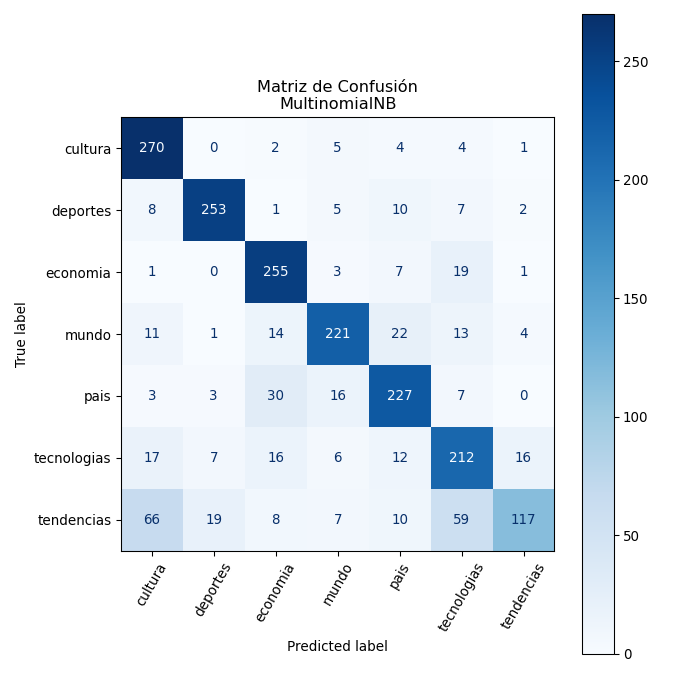

In [38]:
results(ylabels_test_target, mnb, X_test)

In [39]:
print_top_x(mnb)

Palabras más importantes del clasificador 
MultinomialNB


cultura:  the pelicul music artist cancion años nuev seri hac band
	['-7.6', '-7.6', '-7.7', '-7.7', '-7.7', '-7.9', '-7.9', '-8.0', '-8.0', '-8.0']

deportes:  col part equip jugador futbol seleccion chilen cop minut chil
	['-7.4', '-7.5', '-7.6', '-7.6', '-7.6', '-7.6', '-7.6', '-7.7', '-7.7', '-7.7']

economia:  econom empres chil año preci pais merc inform banc inversion
	['-6.9', '-7.5', '-7.5', '-7.7', '-7.7', '-7.7', '-7.7', '-7.8', '-7.8', '-7.8']

mundo:  president pais null unid trump gobiern dij cas person venezuel
	['-7.5', '-7.6', '-7.7', '-7.7', '-7.8', '-7.8', '-7.9', '-8.1', '-8.1', '-8.1']

pais:  chil president ministr gobiern part asegur cas diput ademas polit
	['-7.6', '-7.8', '-7.8', '-7.9', '-7.9', '-8.0', '-8.0', '-8.0', '-8.1', '-8.1']

tecnologias:  nuev aplic usuari tecnolog pued disposit apple telefon chil vide
	['-7.4', '-7.5', '-7.5', '-7.6', '-7.7', '-7.9', '-7.9', '-7.9', '-7.9', '-7.9']

tendenci

En la predicción del modelo Multinomial con Naïve Bayes se observa que el el mejor desempeño se obtuvo al clasificar noticias de la categoría *deportes*, con un F1 score de 89%.  En el resto de las clases, exceptuando *tecnologias* y *tendencias*, se obtuvo un score cercano al 90%. En esta última, el recall fue bajisimo (41%), y se ve un problema similar al del modelo anterior, en donde gran parte de las noticias pertenecientes a tendencias fueron clasificadas como *cultura*.

En las palabras más importantes destacan 'president' y 'gobiern' que se encuentran tanto en *mundo* como en *pais*, asi como 'chil' que se encuentra en 4 de las categorías, esto marca una clara diferencia con el modelo anterior en el que, a simple vista, las palabras más importantes parecen repetirse entre categorías.

# Linear Support Vector Classification

In [40]:
svc = LinearSVC(random_state=42, tol=1e-5)
svc.fit(X_train, ylabels_train_target)

LinearSVC(random_state=42, tol=1e-05)

Resultados clasificación
LinearSVC


              precision    recall  f1-score   support

     cultura       0.85      0.91      0.88       286
    deportes       0.88      0.92      0.90       286
    economia       0.83      0.83      0.83       286
       mundo       0.80      0.78      0.79       286
        pais       0.79      0.73      0.76       286
 tecnologias       0.68      0.69      0.69       286
  tendencias       0.66      0.64      0.65       286

    accuracy                           0.79      2002
   macro avg       0.79      0.79      0.79      2002
weighted avg       0.79      0.79      0.79      2002



<IPython.core.display.Javascript object>


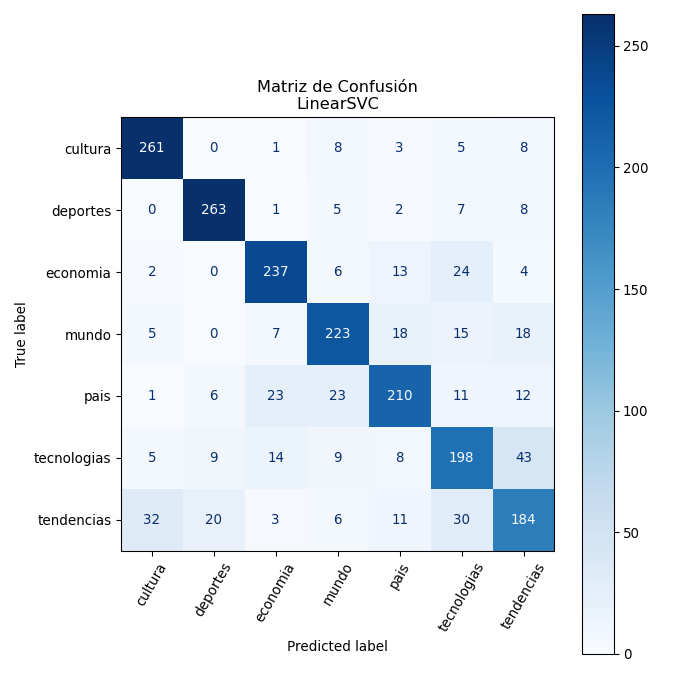

In [41]:
results(ylabels_test_target, svc, X_test)

# Linear classifiers (SVM, logistic regression, etc.) with SGD training.

Clasificadores lineales con gradiente descendente estocástico en el aprendizaje. La elección del clasificador depende de la función de pérdida utilizada.

Haremos una prueba simple de accuracy para elegir rápidamente una función de perdida.

In [42]:
losses = ['hinge','log', 'modified_huber', 'squared_hinge', 'perceptron']
best_acc = 0
for loss in losses:
    sgxd = SGDClassifier(loss=loss,
                     alpha=1e-3, 
                     random_state=42, 
                     max_iter=100,
                     tol=1e-5)
    sgxd.fit(X_train, ylabels_train_target)
    predicted = sgxd.predict(X_test)
    acc = np.mean(predicted == ylabels_test_target)
    print(f"loss: {loss},  acc: {acc:.3f}")
    if acc > best_acc:
        best_acc = acc
        best_loss = loss
        sdgmodel = sgxd
print(f"best\t loss: {best_loss},  acc: {best_acc:.3f}")

loss: hinge,  acc: 0.785
loss: log,  acc: 0.780
loss: modified_huber,  acc: 0.797
loss: squared_hinge,  acc: 0.797
loss: perceptron,  acc: 0.745
best	 loss: squared_hinge,  acc: 0.797


SGDCLassifier utiliza por defecto 'hinge' como funcion de pérdida, la cual entrega un modelo SVM lineal. 'squared_hinge' es como hinge pero con penalización cuadrática.

Resultados clasificación
SGDClassifier


              precision    recall  f1-score   support

     cultura       0.85      0.93      0.89       286
    deportes       0.88      0.92      0.90       286
    economia       0.83      0.83      0.83       286
       mundo       0.81      0.80      0.80       286
        pais       0.80      0.76      0.78       286
 tecnologias       0.68      0.70      0.69       286
  tendencias       0.71      0.65      0.68       286

    accuracy                           0.80      2002
   macro avg       0.80      0.80      0.80      2002
weighted avg       0.80      0.80      0.80      2002



<IPython.core.display.Javascript object>


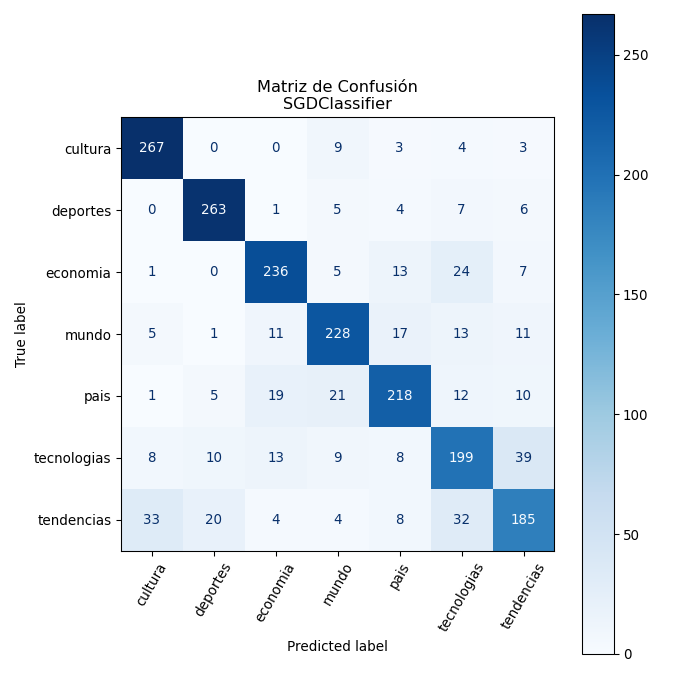

In [43]:
results(ylabels_test_target, sdgmodel, X_test)

In [44]:
print_top_x(sdgmodel)

Palabras más importantes del clasificador 
SGDClassifier


cultura:  artist pelicul cantant band estren cin conciert music seri disc
	['2.0', '1.5', '1.4', '1.3', '1.3', '1.2', '1.2', '1.1', '1.1', '1.1']

deportes:  seleccion cop futbol gol jugador hipic hinch deport entren club
	['1.5', '1.5', '1.5', '1.5', '1.3', '1.3', '1.3', '1.2', '1.2', '1.2']

economia:  econom empres inversion merc alza banc tributari empresari haciend sernac
	['2.4', '1.5', '1.4', '1.4', '1.2', '1.1', '1.0', '0.9', '0.9', '0.9']

mundo:  polic venezuel trump unid president pais dij ciud muert eleccion
	['1.6', '1.5', '1.5', '1.4', '1.2', '1.2', '1.1', '1.1', '1.0', '1.0']

pais:  carabiner diput ministr establec region parlamentari polit alcald piñer educ
	['1.4', '1.2', '1.1', '1.0', '0.9', '0.9', '0.9', '0.8', '0.8', '0.8']

tecnologias:  tecnolog aplic videojueg vea disposit apple usuari cientif consol jueg
	['2.0', '1.9', '1.8', '1.7', '1.5', '1.2', '1.2', '1.2', '1.1', '1.1']

tendencias:  vide youtub in

Este modelo entregó resultados similares al de regresión logistica y al SVM anterior, con buenos rendimientos en cultura y deportes, y los mismos problemas asociados a la clase tendencias.

# K Nearest Neighbors

Al igual que con SGDC, haremos una prueba simple de accuracy para elegir el número de vecinos a utilizar:

In [45]:
best_acc = 0
for n_neighbors in range(2, 40):
    knd = KNeighborsClassifier(n_neighbors=n_neighbors)
    knd.fit(X_train, ylabels_train_target)
    predicted = knd.predict(X_test)
    acc = np.mean(predicted == ylabels_test_target)
    if (n_neighbors < 10 or n_neighbors % 5 == 0):
        print(f"n vecinos: {n_neighbors},  acc: {acc:.3f}")
    if acc > best_acc:
        best_acc = acc
        best_n = n_neighbors
        knnmodel = knd
print(f"best\t n_neigh: {best_n},  acc: {best_acc:.3f}")

n vecinos: 2,  acc: 0.163
n vecinos: 3,  acc: 0.153
n vecinos: 4,  acc: 0.472
n vecinos: 5,  acc: 0.601
n vecinos: 6,  acc: 0.671
n vecinos: 7,  acc: 0.704
n vecinos: 8,  acc: 0.719
n vecinos: 9,  acc: 0.733
n vecinos: 10,  acc: 0.746
n vecinos: 15,  acc: 0.760
n vecinos: 20,  acc: 0.755
n vecinos: 25,  acc: 0.767
n vecinos: 30,  acc: 0.773
n vecinos: 35,  acc: 0.775
best	 n_neigh: 36,  acc: 0.776


Entre n = 15 y el máximo no hay un aumento importante en la accuracy (tampoco se incrementa de forma constante al aumentar el numero de vecinos) pero de todas formas nos quedaremos con el valor más alto (36).

Resultados clasificación
KNeighborsClassifier


              precision    recall  f1-score   support

     cultura       0.79      0.91      0.85       286
    deportes       0.87      0.90      0.89       286
    economia       0.74      0.87      0.80       286
       mundo       0.84      0.74      0.79       286
        pais       0.68      0.74      0.71       286
 tecnologias       0.75      0.68      0.71       286
  tendencias       0.79      0.59      0.68       286

    accuracy                           0.78      2002
   macro avg       0.78      0.78      0.77      2002
weighted avg       0.78      0.78      0.77      2002



<IPython.core.display.Javascript object>


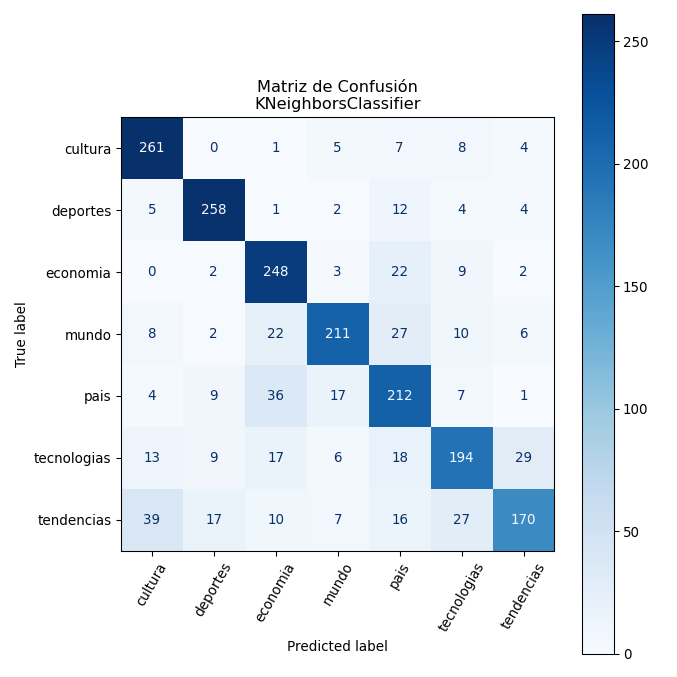

In [46]:
results(ylabels_test_target, knnmodel, X_test)

 Se observan resultados similares a los de modelos anteriores con buen F1 score en *deportes*, buen recall en *cultura*, *deportes* y *economia*, problemas en *tendencias* y una precisión particularmente baja en *pais*.

# Decision tree

In [47]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=42)
dtc.fit(X_train, ylabels_train_target)

DecisionTreeClassifier(random_state=42)

In [48]:
top_feat = np.argsort(dtc.feature_importances_)[-30:][::-1]
print(" ".join(feature_names[j] for j in top_feat))

econom artist cop tecnolog vide pelicul jugador president unid gol band usuari empres disposit adjunt alza gobiern futbol chil seri sanchez cantant torne polic carabiner new internet ministr aplic piñer


Resultados clasificación
DecisionTreeClassifier


              precision    recall  f1-score   support

     cultura       0.69      0.71      0.70       286
    deportes       0.68      0.70      0.69       286
    economia       0.53      0.55      0.54       286
       mundo       0.53      0.50      0.52       286
        pais       0.40      0.45      0.42       286
 tecnologias       0.53      0.48      0.50       286
  tendencias       0.46      0.42      0.44       286

    accuracy                           0.54      2002
   macro avg       0.54      0.54      0.54      2002
weighted avg       0.54      0.54      0.54      2002



<IPython.core.display.Javascript object>


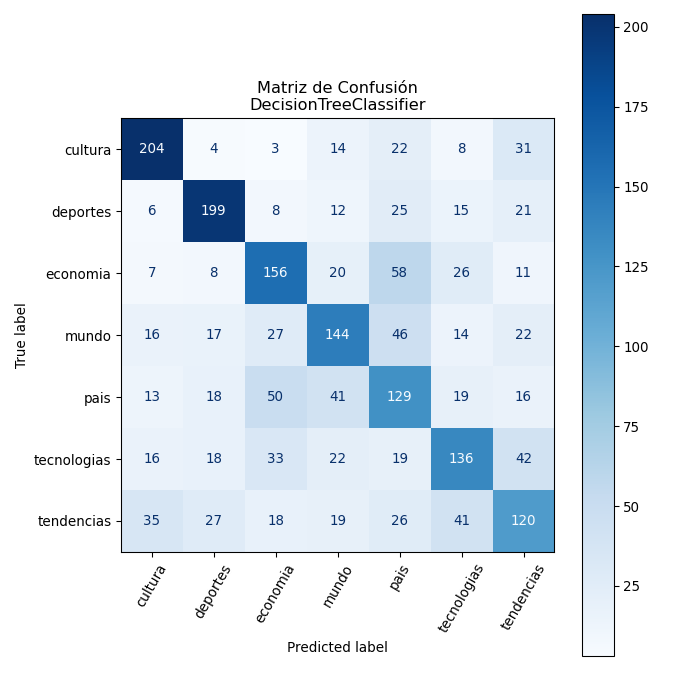

In [49]:
results(ylabels_test_target, dtc, X_test)

En el caso del Decision Tree podemos ver que obtuvo buenos resultados en *cultura* y *deportes* con F1 scores cercanos al 70%, pero claramente no al nivel de los modelos anteriores. En las demás categorías el F1 score ronda el 50%, alcanzando el mínimo en *pais* con un score de apenas 42%. En las palabras más importantes podemos encontrar varias de estas que ya vimos en los demás modelos.
 Probaremos con un Random Forest para ver si se trata de un problema de sobreajuste y si podemos obtener un rendimiento comparable al de los demás modelos vistos.
 
 Al final del cuadernillo se incluye la visualización de un árbol de decisión de menor profundidad.

# RANDOM FOREST

In [50]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=100,
              random_state=42, criterion='gini', class_weight=None,
              max_features='sqrt', verbose=0)
rfc.fit(X_train, ylabels_train_target)

RandomForestClassifier(max_depth=100, max_features='sqrt', random_state=42)

In [51]:
top_feat = np.argsort(rfc.feature_importances_)[-30:][::-1]
print(" ".join(feature_names[j] for j in top_feat))

econom vide artist youtub tecnolog president cop gobiern empres jugador gol chil music merc ministr seleccion usuari part adjunt internet cancion pais pued nuev equip futbol unid pelicul banc segun


Resultados clasificación
RandomForestClassifier


              precision    recall  f1-score   support

     cultura       0.80      0.92      0.85       286
    deportes       0.83      0.88      0.86       286
    economia       0.72      0.80      0.76       286
       mundo       0.77      0.68      0.72       286
        pais       0.73      0.70      0.72       286
 tecnologias       0.69      0.63      0.66       286
  tendencias       0.64      0.60      0.62       286

    accuracy                           0.74      2002
   macro avg       0.74      0.74      0.74      2002
weighted avg       0.74      0.74      0.74      2002



<IPython.core.display.Javascript object>


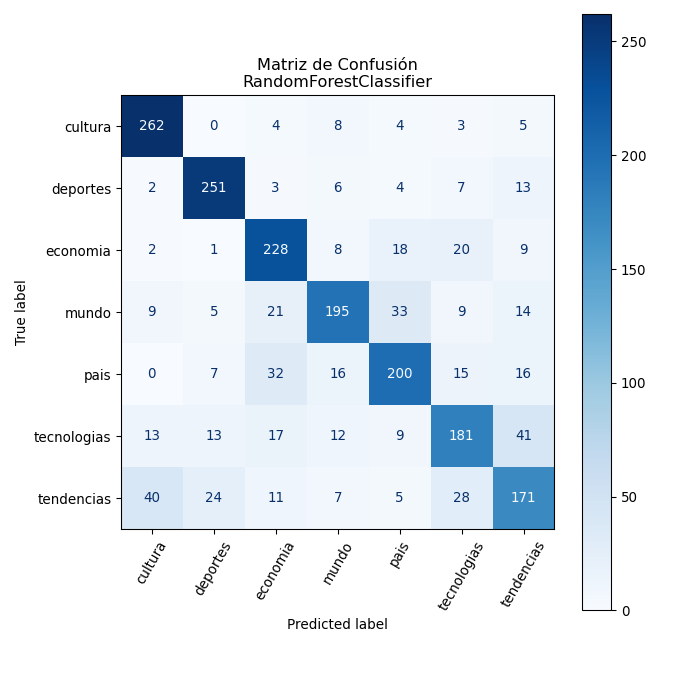

In [52]:
results(ylabels_test_target, rfc, X_test)

La utilización de Random Forest nos entrega una predicción comparable a la de los modelos anteriores. Si bien, la accuracy es un poco más baja, las categorías *cultura* y *deportes* tienen un buen F1 score. Una mejora notable en comparación con el Decision Tree solitario fue la del F1 score de *pais* que aumentó en 30 puntos.

# Otras pruebas

## Comparando el nivel de preprocesamiento

In [53]:
def fit_predict(model, X_tr, y_tr, X_te, ylb):
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    print(classification_report(ylb, preds, target_names=true_labels))

In [54]:
#no stemming
vectorizer_ns = TfidfVectorizer(preprocessor=partial(text_cleaner, stem=False))
X_ns = vectorizer_ns.fit_transform(new_df['text'])
X_train_ns = X_ns[train_idxs]
X_test_ns = X_ns[test_idxs]

In [55]:
#aplicar tfidf directamente 
#Sin PreProcessing spp
vectorizer_spp = TfidfVectorizer()
X_spp = vectorizer_spp.fit_transform(new_df['text'])
X_train_spp = X_spp[train_idxs]
X_test_spp = X_spp[test_idxs]

In [56]:
print("SVC CON PREPROCESSING Y STEMMING DEL TEXTO")
fit_predict(svc, X_train, ylabels_train_target, X_test, ylabels_test_target)
print("SVC CON PREPROCESSING Y SIN STEMMING DEL TEXTO")
fit_predict(svc, X_train_ns, ylabels_train_target, X_test_ns, ylabels_test_target)
print("SVC SIN PREPROCESSING EXTRA")
fit_predict(svc, X_train_spp, ylabels_train_target, X_test_spp, ylabels_test_target)

SVC CON PREPROCESSING Y STEMMING DEL TEXTO
              precision    recall  f1-score   support

     cultura       0.85      0.91      0.88       286
    deportes       0.88      0.92      0.90       286
    economia       0.83      0.83      0.83       286
       mundo       0.80      0.78      0.79       286
        pais       0.79      0.73      0.76       286
 tecnologias       0.68      0.69      0.69       286
  tendencias       0.66      0.64      0.65       286

    accuracy                           0.79      2002
   macro avg       0.79      0.79      0.79      2002
weighted avg       0.79      0.79      0.79      2002

SVC CON PREPROCESSING Y SIN STEMMING DEL TEXTO
              precision    recall  f1-score   support

     cultura       0.85      0.91      0.88       286
    deportes       0.90      0.91      0.91       286
    economia       0.82      0.83      0.82       286
       mundo       0.81      0.80      0.81       286
        pais       0.79      0.76      0.7

In [57]:
print("DECISION TREE CON PREPROCESSING Y STEMMING DEL TEXTO")
fit_predict(dtc, X_train, ylabels_train_target, X_test, ylabels_test_target)
print("DECISION TREE CON PREPROCESSING Y SIN STEMMING DEL TEXTO")
fit_predict(dtc, X_train_ns, ylabels_train_target, X_test_ns, ylabels_test_target)
print("DECISION TREE SIN PREPROCESSING EXTRA")
fit_predict(dtc, X_train_spp, ylabels_train_target, X_test_spp, ylabels_test_target)

DECISION TREE CON PREPROCESSING Y STEMMING DEL TEXTO
              precision    recall  f1-score   support

     cultura       0.69      0.71      0.70       286
    deportes       0.68      0.70      0.69       286
    economia       0.53      0.55      0.54       286
       mundo       0.53      0.50      0.52       286
        pais       0.40      0.45      0.42       286
 tecnologias       0.53      0.48      0.50       286
  tendencias       0.46      0.42      0.44       286

    accuracy                           0.54      2002
   macro avg       0.54      0.54      0.54      2002
weighted avg       0.54      0.54      0.54      2002

DECISION TREE CON PREPROCESSING Y SIN STEMMING DEL TEXTO
              precision    recall  f1-score   support

     cultura       0.67      0.65      0.66       286
    deportes       0.66      0.65      0.65       286
    economia       0.57      0.56      0.57       286
       mundo       0.56      0.52      0.54       286
        pais       0.3

Podemos ver que, en el caso del modelo Support Vector Machine, la utilización de nuestra función de procesamiento del texto no marca una diferencia notable en los resultados, cosa que no ocurre en el caso del Decision Tree en el que sí hay una diferencia no despreciable entre no incluir nuestra función de preprocessing, y hacerlo con stemming incluido. Los resultados varían entre distintos modelos pero por simplicidad se trabajó con `text_cleaner(stem=True)` en todos los modelos.

## Utilizar pesos para las clases al momento de ajustar un modelo

Resultados clasificación
MultinomialNB


              precision    recall  f1-score   support

     cultura       0.90      0.88      0.89       286
    deportes       0.93      0.86      0.89       286
    economia       0.80      0.86      0.83       286
       mundo       0.79      0.81      0.80       286
        pais       0.78      0.79      0.79       286
 tecnologias       0.71      0.68      0.69       286
  tendencias       0.68      0.68      0.68       286

    accuracy                           0.80      2002
   macro avg       0.80      0.80      0.80      2002
weighted avg       0.80      0.80      0.80      2002



<IPython.core.display.Javascript object>


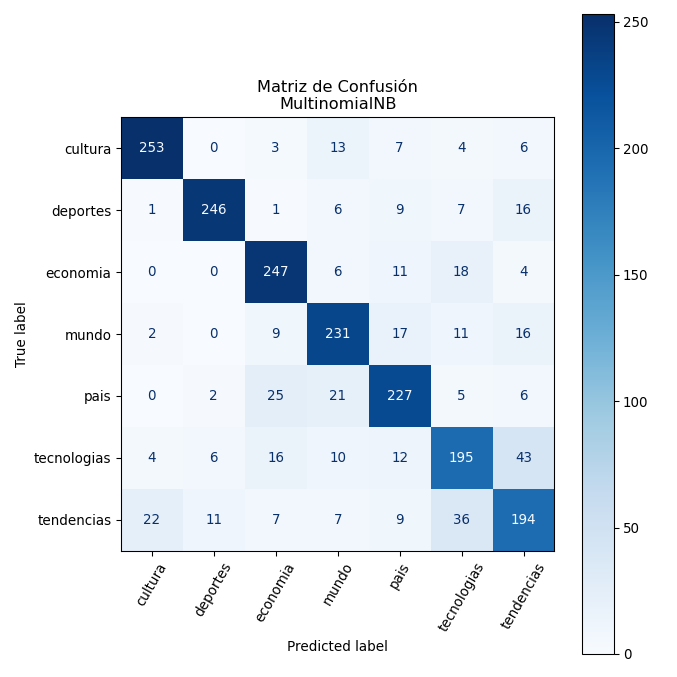

In [175]:
mnb = MultinomialNB(class_prior=[0.65, 1., 1., 1.3, 1.1, 1., 1.65])
mnb.fit(X_train, ylabels_train_target)
results(ylabels_test_target, mnb, X_test)

Ajustando las probabilidades a priori de cada clase (o los pesos, dependiendo del modelo) podemos reducir el número de errores como el que ocurría en MultinomialNB en donde gran parte de las noticias de *tendencias* eran clasificadas como de *cultura*, aumentando la accuracy global de la predicción. Sin embargo, al hacer esto es probable que estemos sobreajustando el modelo o forzando a que este funcione bien con nuestro subconjunto de prueba, y al intentar predecir con nuevos datos los resultados podrían ser peores que al no hacer este ajuste.

No obstante, experimentar con las probabilidades o pesos nos revela información interesante: aunque reduzcamos considerablemente la probabilidad de la clase *cultura*, esta categoría se mantiene constante con un alto F1 score por lo que podemos inferir que el modelo es capaz de reconocerla con facilidad (por palabras como 'pelicul', 'music',  'artist'). Como también fue necesario incrementar la probabilidad de *tendencias*, los errores entre esta clase y *tecnologias* se equilibraron respecto a la predicción original, pero se mantuvieron cerca del total de 80.


## Tiempos de ajuste

In [176]:
X_train

<4662x34024 sparse matrix of type '<class 'numpy.float64'>'
	with 365066 stored elements in Compressed Sparse Row format>

In [63]:
%%timeit
#Logistic regression
lgr.fit(X_train, ylabels_train_target)
predicted = lgr.predict(X_test)

3.01 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
mnb = MultinomialNB()

In [65]:
%%timeit
#multinomial naive bayes
mnb.fit(X_train, ylabels_train_target)
predicted = mnb.predict(X_test)

11 ms ± 364 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%%timeit
#support vector classification
svc.fit(X_train, ylabels_train_target)
predicted = svc.predict(X_test)

306 ms ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
%%timeit
#svm con sdg
sdgmodel.fit(X_train, ylabels_train_target)
predicted = sdgmodel.predict(X_test)

592 ms ± 21.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [182]:
%%timeit
#k nearest neighbors
knnmodel.fit(X_train, ylabels_train_target)
predicted = knnmodel.predict(X_test)

1.75 ms ± 66.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [68]:
%%timeit
#random forest
rfc.fit(X_train, ylabels_train_target)
predicted = rfc.predict(X_test)

7.32 s ± 383 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


A pesar de que la calidad de las predicciones es comparable entre los modelos utilizados, es evidente que algunos son ordenes de magnitud más rápidos que otros al trabajar con la matriz dispersa producto de la transformación tfidf de los textos, aunque para la escala de este trabajo, todos son perfectamente utilizables.

# Conclusiones

Al observar los resultados de las predicciones de distintos algoritmos quedó en evidencia que algunas categorías son más fácilmente reconocibles que otras, como lo son **cultura** y **deportes**, y otras que están mas estrechamente relacionadas y utilizan palabras similares como lo son **tecnologia** y **tendencias**. Sin olvidar que esto ocurrió a pesar de que se trabajó con clases balanceadas en los subconjuntos. 

Dejando fuera la preparación u obtención de los datos, la libreria Sklearn hace muy sencillo el aprendizaje supervisado, poniendo a nuestra disposición diversos algoritmos con modelos que podemos entrenar, predecir y evaluar sus resultados en un par de líneas de código.

Si bien los resultados obtenidos me parecen buenos, me gustaría saber qué tan buenos (o mejores) pueden llegar a ser modelos más complejos, que tengan en cuenta el contexto y el orden de las palabras, y si son capaces de diferenciar de mejor manera las categorías que fueron problemáticas para los modelos utilizados aquí.

# visualizar el arbol

Se incluye la visualización de un árbol de baja profundidad y predicciones poco precisas para hacerse una idea de su estructura y funcionamiento. Un árbol más profundo y más preciso sería más difícil de cargar y de seguir.

In [189]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train, ylabels_train_target)
y_pred = dt.predict(X_test)
print(classification_report(ylabels_test_target, y_pred))
#print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.47      0.60       286
           1       0.78      0.36      0.49       286
           2       0.72      0.35      0.47       286
           3       0.39      0.02      0.05       286
           4       0.19      0.88      0.31       286
           5       0.58      0.20      0.29       286
           6       0.59      0.24      0.34       286

    accuracy                           0.36      2002
   macro avg       0.58      0.36      0.36      2002
weighted avg       0.58      0.36      0.36      2002



In [190]:
top_feat = np.argsort(dt.feature_importances_)[-20:][::-1]
print(" ".join(feature_names[j] for j in top_feat))

econom artist cop tecnolog vide pelicul jugador adjunt ipadiphon trump vea social venezuel chil alza web new chilen prim internacional


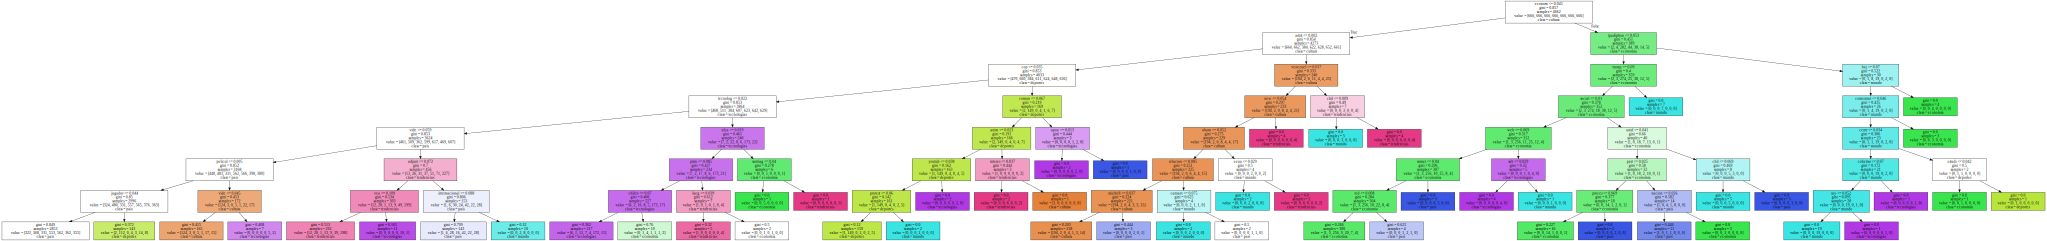

In [191]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree
graph = Source(
    tree.export_graphviz(
        dt,
        out_file=None,
        feature_names=vectorizer.get_feature_names(),
        class_names=true_labels,
        filled = True)
)
display(SVG(graph.pipe(format='svg')))

In [ ]:
tree.export_graphviz(
        dt,
        out_file="tree.dot",
        feature_names=vectorizer.get_feature_names(),
        class_names=labels,
        filled = True
)